

#  Questão 1:




## Leitura, normalização e separação dos dados

In [28]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

dados1 = genfromtxt('/content/artificial1d.csv', delimiter=',')
dados1

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,

In [29]:
media1 = dados1.sum(axis = 0)/dados1.shape[0]
desvio_padrao1 = np.sqrt(np.sum((dados1 - media1)**2, axis = 0)/(dados1.shape[0]-1))
dados_normalizado1 = (dados1 - media1)/desvio_padrao1
dados_normalizado1

array([[-1.64708932, -2.01776249],
       [-1.53349695, -1.30904437],
       [-1.41990459, -1.10124292],
       [-1.30631222, -0.883802  ],
       [-1.19271985, -0.33101133],
       [-1.07912749, -0.4681726 ],
       [-0.96553512, -0.8094684 ],
       [-0.85194275, -0.89518064],
       [-0.73835038, -0.90816383],
       [-0.62475802, -0.87244232],
       [-0.51116565, -0.89704272],
       [-0.39757328, -1.22359975],
       [-0.28398092, -0.73889504],
       [-0.17038855, -0.48776262],
       [-0.05679618,  0.02936257],
       [ 0.05679618,  0.26409184],
       [ 0.17038855,  0.02802824],
       [ 0.28398092,  0.59377355],
       [ 0.39757328,  1.16664694],
       [ 0.51116565,  0.87685048],
       [ 0.62475802,  0.87817074],
       [ 0.73835038,  1.0151381 ],
       [ 0.85194275,  1.43105993],
       [ 0.96553512,  0.50825472],
       [ 1.07912749,  0.49448105],
       [ 1.19271985,  0.59641045],
       [ 1.30631222,  0.70934463],
       [ 1.41990459,  0.97511683],
       [ 1.53349695,

In [30]:
x = dados_normalizado1[:, [0]]
y = dados_normalizado1[:, [1]]
entradas_mod1 = np.c_[np.ones(x.shape[0]), x]

## item a: Mínimos quadrados ordinários

In [31]:
w_mod1 = np.linalg.inv(entradas_mod1.T.dot(entradas_mod1)).dot(entradas_mod1.T).dot(y)
w_mod1


array([[0.        ],
       [0.89749391]])

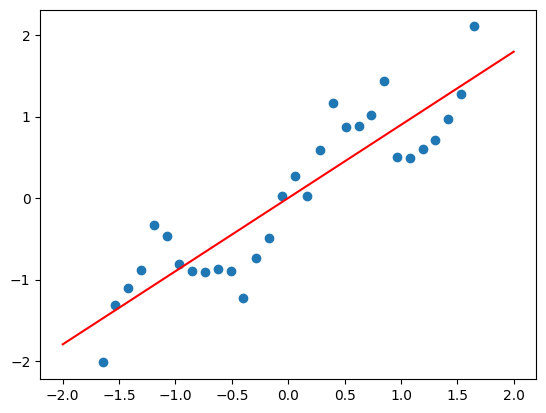

In [32]:
plt.scatter(x,y)
xx = np.linspace(-2,2,100)
yy = w_mod1[0] + w_mod1[1]*xx
plt.plot(xx, yy, color='red')

In [33]:
predicoes = entradas_mod1.dot(w_mod1)
erros_denorm = dados1[:, [1]] - predicoes*desvio_padrao1[1] + media1[1]

MSE1 = 0.5*np.mean(erros_denorm**2)

MSE1

np.float64(0.11584481812947749)

## item b: Gradiente Descendente

In [ ]:
alfa = 0.1

w_mod2 = np.random.randn(dados1.shape[1], 1) #numero de atributos = 3

iterations = 300
MSE = np.zeros(iterations)

for i in range(iterations):
  predicoes = entradas_mod1.dot(w_mod2)
  erros = y - predicoes
  erros_denorm = dados1[:, [1]] - predicoes*desvio_padrao1[1] + media1[1]

  MSE[i] = 0.5*np.mean(erros_denorm**2)


  w_mod2 += (alfa/dados1.shape[0])*entradas_mod1.T.dot(erros)

w_mod2

array([[1.53377361e-14],
       [8.97493907e-01]])

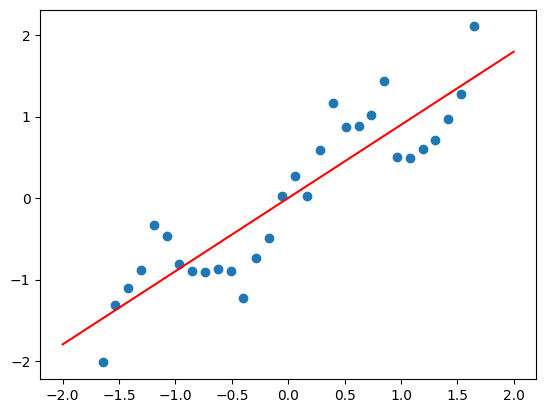

In [ ]:
plt.scatter(x,y)
xx = np.linspace(-2,2,100)
yy = w_mod2[0] + w_mod2[1]*xx
plt.plot(xx, yy, color='red')

0.11584481812947499


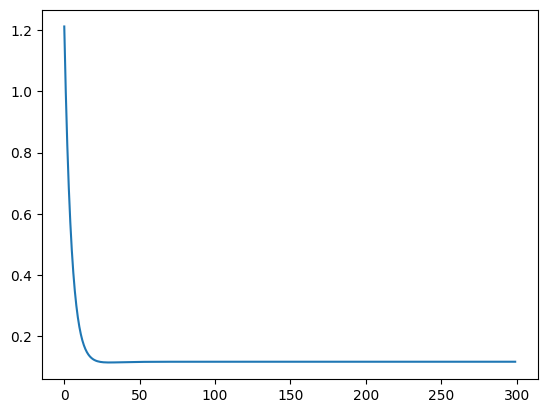

In [ ]:
plt.plot(range(iterations), MSE)
print(MSE[iterations-1])

## item c: Gradiente Descendente Estocástico

In [ ]:
alfa2 = 0.001

m = entradas_mod1.shape[0]
w_mod3 = np.random.randn(entradas_mod1.shape[1], 1)  # shape = (2, 1)
iterations = 300
MSE3 = np.zeros(iterations)

for i in range(iterations):
    mse_iteration = 0

    for j in range(m):
        xi = entradas_mod1[j].reshape(1, -1)  # shape (1, 2)
        yi = y[j].reshape(1, 1)               # shape (1, 1)

        predicao = xi.dot(w_mod3)
        erro = yi - predicao
        erros_denorm = dados1[j, [1]] - predicao*desvio_padrao1[1] + media1[1]

        mse_iteration += 0.5 * erros_denorm**2

        w_mod3 += alfa2 * xi.T.dot(erro)

    MSE3[i] = mse_iteration.item() / m

w_mod3

array([[-3.13646630e-04],
       [ 8.97021383e-01]])

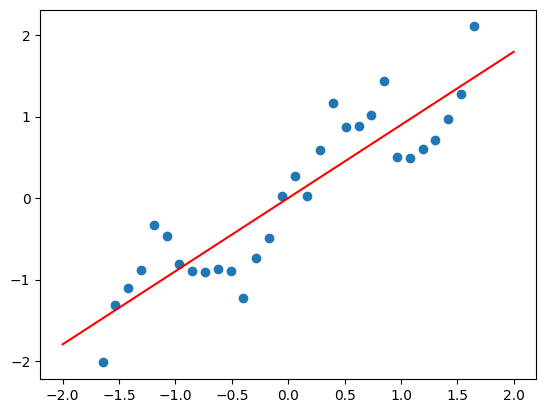

In [ ]:
plt.scatter(x,y)
xx = np.linspace(-2,2,100)
yy = w_mod3[0] + w_mod3[1]*xx
plt.plot(xx, yy, color='red')

0.11607637750224985


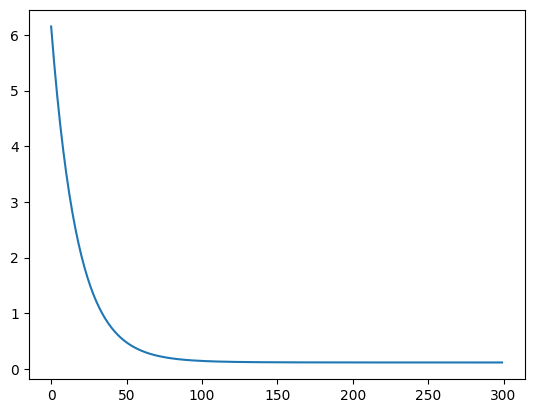

In [ ]:
plt.plot(range(iterations), MSE3)
print(MSE3[iterations-1])

# Questão 2

In [3]:
dados2 = genfromtxt('/content/california.csv', delimiter=',')

dados2.shape

(1000, 9)

## item a: Split e normalização dos dados

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 1. Separação dos dados em treino/teste(80/20), atributos previsores e classe
X_treino, X_teste, y_treino, y_teste = train_test_split(dados2[:, 0:8], dados2[:, [8]], test_size=0.2, random_state=0)

# 2. Normalizando os inputs com MinMaxScaler
input_scaler = MinMaxScaler()
X_treino_normalizado = input_scaler.fit_transform(X_treino)
X_teste_normalizado = input_scaler.transform(X_teste)

# 3. Normalizando outputs com StandardScaler
output_scaler = StandardScaler()
y_treino_normalizado = output_scaler.fit_transform(y_treino)
y_teste_normalizado = output_scaler.transform(y_teste)

media2 = dados2.sum(axis = 0)/dados2.shape[0]
desvio_padrao2 = np.sqrt(np.sum((dados2 - media2)**2, axis = 0)/(dados2.shape[0]-1))

X_treino_normalizado = np.c_[np.ones(X_treino_normalizado.shape[0]), X_treino_normalizado]
X_teste_normalizado = np.c_[np.ones(X_teste_normalizado.shape[0]), X_teste_normalizado]

## item b: Treinamento de modelos de regressão polinomial 1 a 13

In [5]:
def inserir_polinomio(dados_treino_x, ordem):
  for i in range(dados_treino_x.shape[1]-1):
    for j in range(1,ordem):
      newcol = dados_treino_x[:, [i+1]]**(j+1)
      dados_treino_x = np.column_stack((dados_treino_x, newcol))
  return dados_treino_x

In [6]:
#ordem 1
poly1 = inserir_polinomio(X_treino_normalizado, 1)
poly1_teste = inserir_polinomio(X_teste_normalizado, 1)
w_poly1 = np.linalg.inv(poly1.T.dot(poly1)).dot(poly1.T).dot(y_treino_normalizado)


In [7]:
#ordem 2
poly2 = inserir_polinomio(X_treino_normalizado, 2)
poly2_teste = inserir_polinomio(X_teste_normalizado, 2)
w_poly2 = np.linalg.inv(poly2.T.dot(poly2)).dot(poly2.T).dot(y_treino_normalizado)


In [8]:
#ordem 3
poly3 = inserir_polinomio(X_treino_normalizado, 3)
poly3_teste = inserir_polinomio(X_teste_normalizado, 3)
w_poly3 = np.linalg.inv(poly3.T.dot(poly3)).dot(poly3.T).dot(y_treino_normalizado)


In [9]:
#ordem 4
poly4 = inserir_polinomio(X_treino_normalizado, 4)
poly4_teste = inserir_polinomio(X_teste_normalizado, 4)
w_poly4 = np.linalg.inv(poly4.T.dot(poly4)).dot(poly4.T).dot(y_treino_normalizado)


In [10]:
#ordem 5
poly5 = inserir_polinomio(X_treino_normalizado, 5)
poly5_teste = inserir_polinomio(X_teste_normalizado, 5)
w_poly5 = np.linalg.inv(poly5.T.dot(poly5)).dot(poly5.T).dot(y_treino_normalizado)


In [11]:
#ordem 6
poly6 = inserir_polinomio(X_treino_normalizado, 6)
poly6_teste = inserir_polinomio(X_teste_normalizado, 6)
w_poly6 = np.linalg.inv(poly6.T.dot(poly6)).dot(poly6.T).dot(y_treino_normalizado)


In [12]:
#ordem 7
poly7 = inserir_polinomio(X_treino_normalizado, 7)
poly7_teste = inserir_polinomio(X_teste_normalizado, 7)
w_poly7 = np.linalg.inv(poly7.T.dot(poly7)).dot(poly7.T).dot(y_treino_normalizado)


In [13]:
#ordem 8
poly8 = inserir_polinomio(X_treino_normalizado, 8)
poly8_teste = inserir_polinomio(X_teste_normalizado, 8)
w_poly8 = np.linalg.inv(poly8.T.dot(poly8)).dot(poly8.T).dot(y_treino_normalizado)


In [14]:
#ordem 9
poly9 = inserir_polinomio(X_treino_normalizado, 9)
poly9_teste = inserir_polinomio(X_teste_normalizado, 9)
w_poly9 = np.linalg.inv(poly9.T.dot(poly9)).dot(poly9.T).dot(y_treino_normalizado)


In [15]:
#ordem 10
poly10 = inserir_polinomio(X_treino_normalizado, 10)
poly10_teste = inserir_polinomio(X_teste_normalizado, 10)
w_poly10 = np.linalg.inv(poly10.T.dot(poly10)).dot(poly10.T).dot(y_treino_normalizado)


In [16]:
#ordem 11
poly11 = inserir_polinomio(X_treino_normalizado, 11)
poly11_teste = inserir_polinomio(X_teste_normalizado, 11)
w_poly11 = np.linalg.inv(poly11.T.dot(poly11)).dot(poly11.T).dot(y_treino_normalizado)


In [17]:
#ordem 12
poly12 = inserir_polinomio(X_treino_normalizado, 12)
poly12_teste = inserir_polinomio(X_teste_normalizado, 12)
w_poly12 = np.linalg.inv(poly12.T.dot(poly12)).dot(poly12.T).dot(y_treino_normalizado)


In [18]:
#ordem 13
poly13 = inserir_polinomio(X_treino_normalizado, 13)
poly13_teste = inserir_polinomio(X_teste_normalizado, 13)
w_poly13 = np.linalg.inv(poly13.T.dot(poly13)).dot(poly13.T).dot(y_treino_normalizado)


## item c: RMSE para cada modelo

### c.1: Treino

In [24]:
poly_sets_treino = [poly1, poly2, poly3, poly4, poly5, poly6, poly7, poly8, poly9, poly10, poly11, poly12, poly13]
poly_sets_teste = [poly1_teste, poly2_teste, poly3_teste, poly4_teste, poly5_teste, poly6_teste, poly7_teste, poly8_teste, poly9_teste, poly10_teste, poly11_teste, poly12_teste, poly13_teste]
w_sets = [w_poly1, w_poly2, w_poly3, w_poly4, w_poly5, w_poly6, w_poly7, w_poly8, w_poly9, w_poly10, w_poly11, w_poly12, w_poly13]

RMSE_treino = np.zeros(13)

for i in range(len(poly_sets_treino)):
  y_previsto_treino = poly_sets_treino[i].dot(w_sets[i])
  y_previsto_unnorm = output_scaler.inverse_transform(y_previsto_treino)
  #y_previsto_unnorm = y_previsto_treino*desvio_padrao2[8] + media2[8]
  erros_poly = y_treino - y_previsto_unnorm

  RMSE_treino[i] = (np.mean(erros_poly**2))**0.5

RMSE_treino

array([0.67293385, 0.65066666, 0.62684407, 0.61904686, 0.60917076,
       0.59744162, 0.5921988 , 0.58882961, 0.59905491, 1.00300126,
       0.71054883, 9.04186742, 9.83301269])

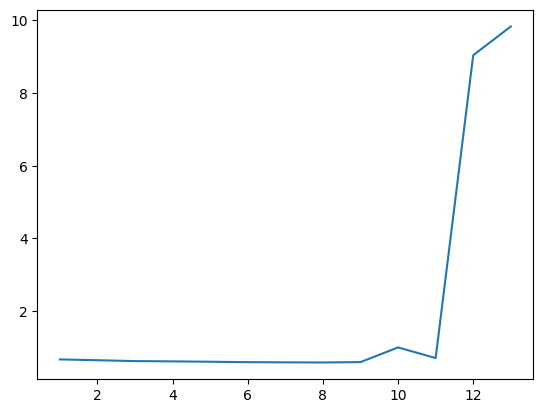

In [25]:
#plot
plt.plot(range(1,14), RMSE_treino)

### c.2: Teste

In [22]:
RMSE_teste = np.zeros(13)

for i in range(len(poly_sets_teste)):
  y_previsto_teste = poly_sets_teste[i].dot(w_sets[i])
  y_previsto_unnorm = output_scaler.inverse_transform(y_previsto_teste)

  erros_poly = y_teste - y_previsto_unnorm

  RMSE_teste[i] = (np.mean(erros_poly**2))**0.5

RMSE_teste

array([6.70504057e-01, 6.65867737e-01, 8.48661400e-01, 1.48674289e+00,
       6.10438175e+00, 3.53759360e+01, 3.71420272e+01, 1.52469661e+02,
       1.43179043e+04, 3.06241390e+06, 3.29853779e+06, 6.27234428e+08,
       8.58292582e+09])

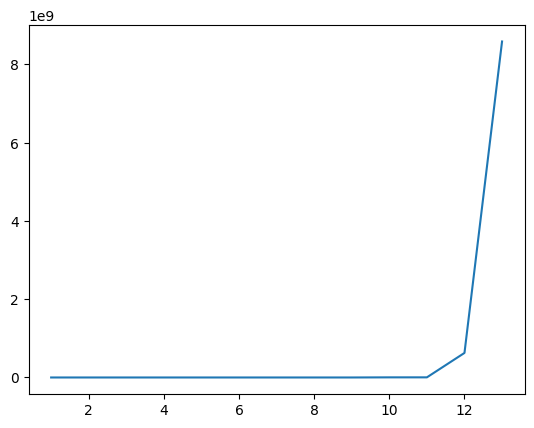

In [23]:
#plot
plt.plot(range(1,14), RMSE_teste)

## item d: Adicionando termo de regularização L2

In [ ]:
lambda_reg = 0.01
w_sets_reg = []
for i in range(13):
  w_sets_reg.append(np.linalg.inv(poly_sets_treino[i].T.dot(poly_sets_treino[i]) + lambda_reg*np.identity(poly_sets_treino[i].shape[1])).dot(poly_sets_treino[i].T).dot(y_treino_normalizado))


### d.1: Treino regularizado

In [ ]:
RMSE_treino_reg = np.zeros(13)

for i in range(len(poly_sets_treino)):
  y_previsto_treino = poly_sets_treino[i].dot(w_sets_reg[i])
  y_previsto_unnorm = output_scaler.inverse_transform(y_previsto_treino)

  erros_poly = y_treino - y_previsto_unnorm

  RMSE_treino_reg[i] = (np.mean(erros_poly**2))**0.5

RMSE_treino_reg

array([0.67293731, 0.65091431, 0.63472495, 0.63053479, 0.62860389,
       0.62784323, 0.62717285, 0.62613184, 0.62480177, 0.62345693,
       0.62229132, 0.62137316, 0.62069856])

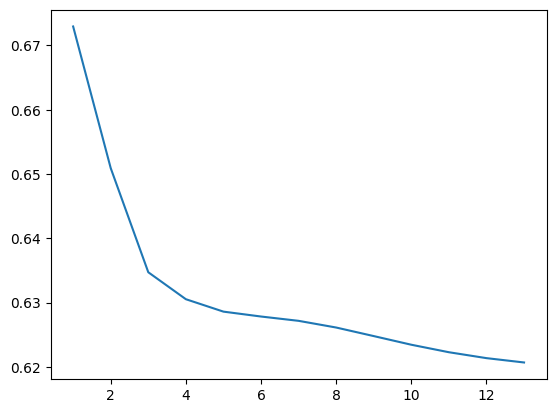

In [ ]:
#plot
plt.plot(range(1,14), RMSE_treino_reg)

### d.2: Teste regularizado

In [ ]:
RMSE_teste_reg = np.zeros(13)

for i in range(len(poly_sets_teste)):
  y_previsto_teste = poly_sets_teste[i].dot(w_sets_reg[i])
  y_previsto_unnorm = output_scaler.inverse_transform(y_previsto_teste)

  erros_poly = y_teste - y_previsto_unnorm

  RMSE_teste_reg[i] = (np.mean(erros_poly**2))**0.5

RMSE_teste_reg

array([0.67076847, 0.6547426 , 0.62835311, 0.65165075, 0.75532186,
       0.91316016, 1.10264203, 1.26934447, 1.32580631, 1.19617813,
       0.92335073, 1.09892971, 2.32446869])

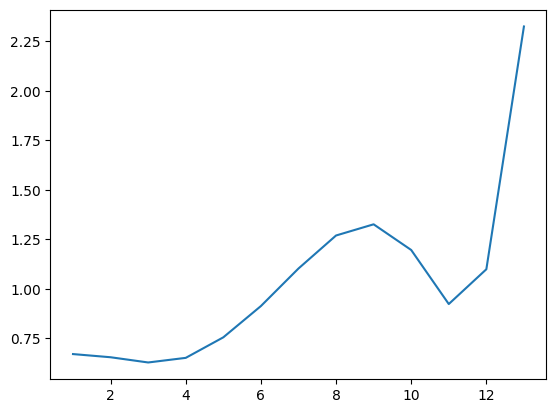

In [ ]:
#plot
plt.plot(range(1,14), RMSE_teste_reg)